In [ ]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Training and Visualizing a Decision Tree

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

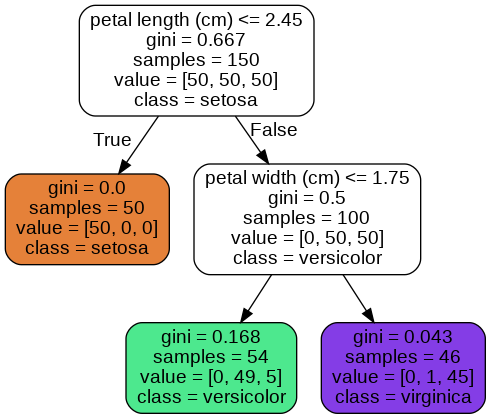

In [ ]:
# colab 사용자만 실행하세요

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_clf,
                           feature_names=iris.feature_names[2:],
                           class_names=iris.target_names,
                           rounded=True,
                           filled=True)

graph = graph_from_dot_data(dot_data)

from IPython.display import Image
Image(graph.create_png())

[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

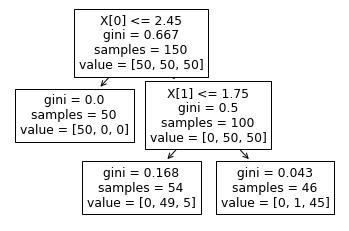

In [ ]:
# jupyter notebook 사용자는 이 코드를 실행하세요

from sklearn import tree
tree.plot_tree(tree_clf.fit(X, y))

# Making Predictions

*Gini Index*
$$ G_i = 1 - \sum^{n}_{k=1} {p_{i,k}}^2 $$
* $p_{i,k}$ is the ratio of class *k* instances among the training instances in the $i^{th}$ node.
* For example, the depth-2 left
node has a gini score equal to $1 – (\frac{0}{54})^2 – (\frac{49}{54})^2 – (\frac{5}{54})^2 ≈ 0.168$.

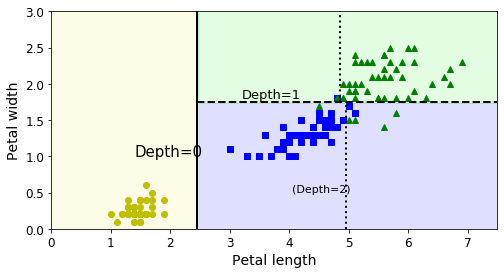

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))  
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

# Estimating Class Probabilities

In [ ]:
print(tree_clf.predict_proba([[5, 1.5]]))
print(tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


# The CART Training Algorithm

*CART loss function (impurity) for classification* for single feature *k* and a threshold $t_k$
$$ I(k,\ t_k) = \frac{m_{left}}{m}I(left) + \frac{m_{right}}{m}I(right) \\
\mbox{where }
\begin{cases}
I(left/right) \mbox{ measures the impurity of the left/right subset,} \\
m_{left/right} \mbox{ is the number of instances in the left/right subset.}
\end{cases}$$

*Cross Entropy*
$$ C_i = - \sum^n_{\underset {p_{i,k}\ne0}
{k=1}} p_{i,k} \log(p_{i,k}) $$

* $p_{i,k}$ is the ratio of class *k* instances among the training instances in the $i^{th}$ node.

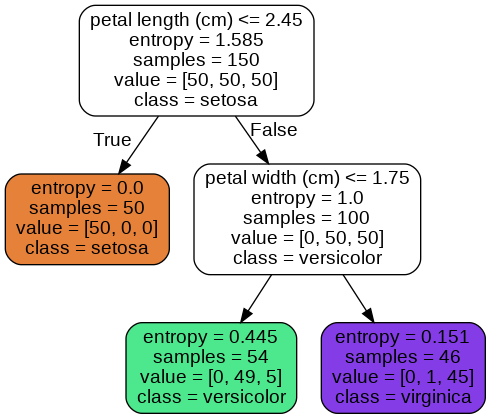

In [ ]:
tree_clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
tree_clf_entropy.fit(X, y)

dot_data2 = export_graphviz(tree_clf_entropy,
                           feature_names=iris.feature_names[2:],
                           class_names=iris.target_names,
                           rounded=True,
                           filled=True)

graph2 = graph_from_dot_data(dot_data2)

from IPython.display import Image
Image(graph2.create_png())

* For example, the depth-2 left node has an entropy equal to $ -\frac{49}{54}\log(\frac{49}{54})-\frac{5}{54}\log(\frac{5}{54})
≈ 0.31 $.
* For Shannon entropy, $ -\frac{49}{54}\log_2(\frac{49}{54})-\frac{5}{54}\log_2(\frac{5}{54})
≈ 0.445 $. 

So should you use Gini impurity or entropy? The truth is, most of the time it does not make a big
difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default.
However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the
tree, while entropy tends to produce slightly more balanced trees.

# Regularization Hyperparameters

*Note
* Other algorithms work by first training the Decision Tree without restrictions, then **pruning** (deleting) unnecessary nodes. A node
whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not statistically significant.
Standard statistical tests, such as the $\chi^2$ test, are used to estimate the probability that the improvement is purely the result of
chance (which is called the null hypothesis). If this probability, called the p-value, is higher than a given threshold (typically 5%,
controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. The pruning continues until
all unnecessary nodes have been pruned.

*Misclassification error*
$$ E_i = 1 - \max({p_{i,k}}) $$